Project

1. What data do you have?

Our data consists of specific questions which are:
18. How many units are you taking currently?
54. What is your current living situation?
55. How do you commute to school?
56. Do you have a UCR dining plan?
57. How many times a week do you purchase food or drinks from somewhere on campus?
58. What items do you purchase?
59. What is the biggest reason you do not purchase more food and drinks on campus?

Each column consists of one of these questions, while each row consists of an individual’s response to each question. Essentially, the data we have relates to the student’s amount of units they are taking, their living situation and if they commute, whether or not they purchase food on campus, and if they don’t what is the reason why.


2. What would you like to know?


We would like to know if the amount of units a student has affects how often they get food on campus. We are trying to determine if a student’s total units affect if they buy food often if they have at and/or 12 units as opposed to students who are part time who take less than 12 units. We are also trying to determine if their living situation affects whether or not students purchase food on campus. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
%matplotlib inline

Graph #1: FINDING THE CORRELATION BETWEEN HOW A STUDENT COMMUTES BY SPLITTING IT INTO TWO SUBGROUPS (NON-CAR VS CAR) AND HOW MANY ITEMS THEY PURCHASE

In [3]:
df = pd.read_csv(r'C:\Users\lenar\Desktop\lab 5_6_f22\lab6\data.csv')
#df = df['57. How many times a week do you purchase food or drinks from somewhere on campus?'].replace(np.nan, 0)
df['57. How many times a week do you purchase food or drinks from somewhere on campus?'] = df['57. How many times a week do you purchase food or drinks from somewhere on campus?'].replace(np.nan, 0)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lenar\\Desktop\\lab 5_6_f22\\lab6\\data.csv'

In [3]:
#Table that splits the way someone commutes + how many items they purchase in total
table = pd.pivot_table(data=df, values = '57. How many times a week do you purchase food or drinks from somewhere on campus?', index = '55. How do you commute to school?', aggfunc = 'count') 
table

,57. How many times a week do you purchase food or drinks from somewhere on campus?
55. How do you commute to school?,
Bicycle / Scooter / Skateboard,14
Carpool,1
Drive Yourself,24
Driven (Dropped-off),4
Public Transportation,4
Walk,34


In [4]:
#Table of group1: non-car consists of  Walk, Public transportation, and Bicycle / Scooter / Skateboard
group1 = pd.pivot_table(data=df, values = '57. How many times a week do you purchase food or drinks from somewhere on campus?', index = '55. How do you commute to school?', aggfunc = 'count') 
group1.loc[[ 'Walk' ,'Public Transportation', 'Bicycle / Scooter / Skateboard']]

,57. How many times a week do you purchase food or drinks from somewhere on campus?
55. How do you commute to school?,
Walk,34
Public Transportation,4
Bicycle / Scooter / Skateboard,14


In [6]:
#Take group1 mean in terms of how many items they purchase
group1 = pd.pivot_table(data=df, values = '57. How many times a week do you purchase food or drinks from somewhere on campus?', index = '55. How do you commute to school?', aggfunc = 'count') 
group1_combined = group1.loc[[ 'Walk' ,'Public Transportation', 'Bicycle / Scooter / Skateboard']].mean()[0]
group1.loc[[ 'Walk' ,'Public Transportation', 'Bicycle / Scooter / Skateboard']].mean()

57. How many times a week do you purchase food or drinks from somewhere on campus?    17.333333
dtype: float64

 -GROUP 2-

In [7]:
#Table of group2 consists of car which are 'Carpool' ,'Driven (Dropped-off)', 'Drive Yourself'
group2 = pd.pivot_table(data=df, values = '57. How many times a week do you purchase food or drinks from somewhere on campus?', index = '55. How do you commute to school?', aggfunc = 'count') 
group2.loc[[ 'Carpool' ,'Driven (Dropped-off)', 'Drive Yourself']]

,57. How many times a week do you purchase food or drinks from somewhere on campus?
55. How do you commute to school?,
Carpool,1
Driven (Dropped-off),4
Drive Yourself,24


In [9]:
#Take group2 mean in terms of how many items they purchase
group2 = pd.pivot_table(data=df, values = '57. How many times a week do you purchase food or drinks from somewhere on campus?', index = '55. How do you commute to school?', aggfunc = 'count') 
group2_combined = group2.loc[[ 'Carpool' ,'Driven (Dropped-off)', 'Drive Yourself']].mean()[0]
group2.loc[[ 'Carpool' ,'Driven (Dropped-off)', 'Drive Yourself']].mean()

57. How many times a week do you purchase food or drinks from somewhere on campus?    9.666667
dtype: float64

<AxesSubplot:>

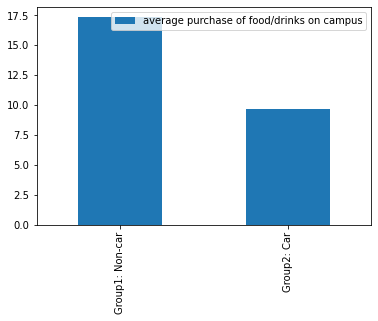

In [10]:
#plot the new sub groups into 2 groups noncar vs car
data = [group1_combined, group2_combined]
groups = pd.DataFrame(data)
mapping = {groups.columns[0]:'average purchase of food/drinks on campus'}
groups = groups.rename(columns=mapping)

mappings = {groups.index[0]:'Group1: Non-car', groups.index[1]:'Group2: Car'}
groups = groups.rename(index=mappings)
groups.plot(kind = 'bar')


Explanation:
Here we defined two subgroups which consists of Group1:Non-Car and Group2:Car. Group1:Non-car consists of groups 'Walk, Public Transportation, and Bicycle / Scooter / Skateboard)' while Group2:Car consists of 'Carpool , Driven (Dropped-off), Drive Yourself'. We first figure out the count for each individual group then split them into Group1:Non-car and Group2:Car. By doing so, we take the mean for Group1:Non-car which is 17.0, and the mean for Group2:Car which is 9.666667. We can conclude that those who do not commute by car (aka Group1:Non-car) are the ones who end up purchasing more food/drinks on campus than those who commute by car (aka Group2:Car) as seen on the graph. 

-Graph #2: FINDING THE CORRELATION BETWEEN STUDENTS WHO HAVE A DINING PLAN VS STUDENTS WHO DO NOT HAVE A DINING PLAN BY COMPARING HOW MANY ITEMS THEY BUY

In [30]:
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")
meal_plan = pd.read_csv(r'C:\Users\lenar\Desktop\lab 5_6_f22\lab6\data.csv')


In [14]:
#my path to where my data.csv is located
df = pd.read_csv(r'C:\Users\lenar\Desktop\lab 5_6_f22\lab6\data.csv')

In [58]:
#Group_a: students who have dining plan 
group56_57 = df[['56. Do you have a UCR dining plan?', '57. How many times a week do you purchase food or drinks from somewhere on campus?']]
group56_57_yes = group56_57.loc[group56_57['56. Do you have a UCR dining plan?'] == "Yes"]
group56_57_yes = group56_57_yes.drop('56. Do you have a UCR dining plan?', axis=1)
group56_57_yes = group56_57_yes.reset_index(drop=True)

students = group56_57_yes.value_counts().sum()
total_items = group56_57_yes['57. How many times a week do you purchase food or drinks from somewhere on campus?'].sum()

total_items / students
#The mean for group_a: students who do have a dining plan
#if we were to exclude the outlier is would instead be 80 (total items) / 22(students) = average of 3.6 items 

4.304347826086956

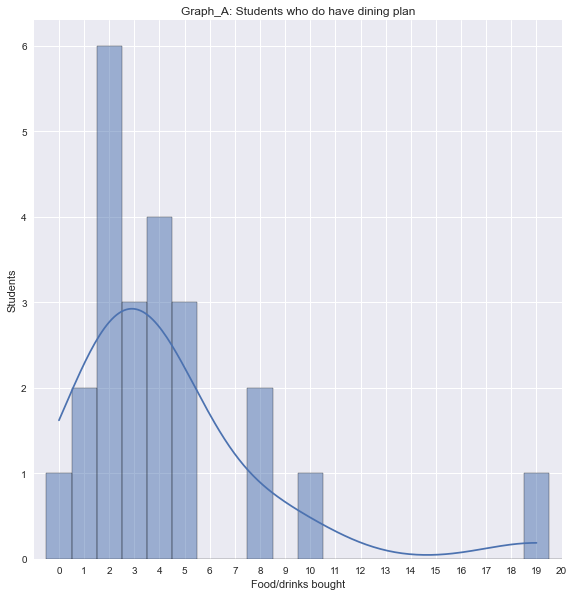

In [61]:
# Plot of students who do have a UCR dining plan, 
# and how many times a week they purchase food/drink on campus
bins = np.arange(26) - 0.5
sns.displot(data=group56_57_yes, bins=bins, kde=True, height=8, legend=False)
plt.xticks(range(32))
plt.xlim([-1,20])
plt.title('Group_A: Students who do have dining plan')
plt.xlabel('Food/drinks bought')
plt.ylabel('Students')
plt.show()

Explanation:
For Group_A:Students who do have dining plan, there are a total of 23 students with a total of 99 food/drinks if we were to exclude the outlier it would be 22 students with a total of 80 food/drinks. By taking the mean of the total amount of food/drinks bought and # of students who do have dining plan we got the average of 4.304347826086956 items. If we were to exclude the outlier, which is the 1 student who bought 19 items per week, it would instead be an average of 3.636363636363636 items. 

In [20]:
#group_b: students who do not have a dining plan
group56_57 = df[['56. Do you have a UCR dining plan?', '57. How many times a week do you purchase food or drinks from somewhere on campus?']]
group56_57_no = group56_57.loc[group56_57['56. Do you have a UCR dining plan?'] == "No"]
group56_57_no = group56_57_no.drop('56. Do you have a UCR dining plan?', axis=1)
group56_57_no = group56_57_no.reset_index(drop=True)

In [60]:
#The mean for group_b: students who do not have a dining plan
students = group56_57_no.value_counts().sum()
total_items = group56_57_no['57. How many times a week do you purchase food or drinks from somewhere on campus?'].sum()

total_items / students
#avereage amount of items bought for group_b

2.307017543859649

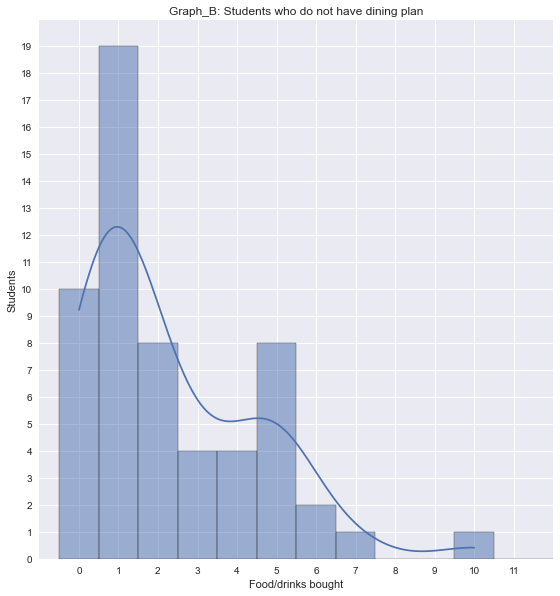

In [62]:
# Plot of students who do NOT have a UCR dining plan, 
# and how many times a week they purchase food/drink on campus
bins = np.arange(57) - 0.5
sns.displot(data=group56_57_no, bins=bins, kde=True, height=8, legend=False)
plt.xticks(range(12))
plt.yticks(range(20))
plt.xlim([-1,12])
plt.title('Group_B: Students who do not have dining plan')
plt.xlabel('Food/drinks bought')
plt.ylabel('Students')
plt.show()

Explanation:
For Group_B: Students who do not have dining plan, there are a total of 57 students with a total of 132 food/drinks.By taking the mean of the total amount of food/drinks bought and # of students who do not have dining plan we got the average of 2.307017543859649 items. 


Summary:
Here we defined two groups which consists of "Group_A:Students who have dining plan" and "Graph_B: Students who do not have dining plan". We can see that Group_a has a bigger average of items than Group_B which is surprising due to the fact that we believed that it would be the other way around. Even if we were to exclude the outlier for Group_A, Group_A's average is still bigger than Group_B. We can conclude that those who have a dining plan end up buying more food/drinks than those who do not have a dining plan.
